In [ ]:
#Import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import datasets

In [ ]:
#Download the dataset

(train_img, train_labels), (test_img, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
#Normalization the pixels values in the range of 0 to 1

train_img, test_img = train_img/255.0, test_img/255.0

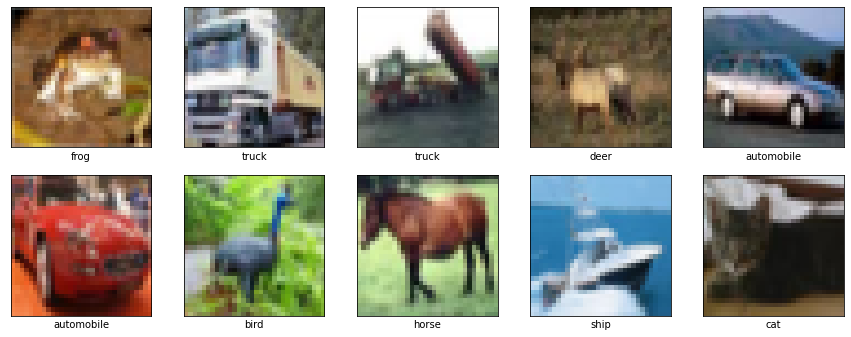

In [ ]:
#10 image class
class_name = ['aeroplane', 'automobile', 'bird', 'cat', 'deer', ' dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize = (15,15))

for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(train_img[i])
  plt.xlabel(class_name[train_labels[i][0]])

In [ ]:
#Creating the CNN model

from keras.models import Sequential
model = Sequential()

In [ ]:
#Step1 - Convolution
from keras.layers import Conv2D
model.add(Conv2D(32,(3,3),
                 input_shape =(32,32,3),
                 activation = 'relu'))

In [ ]:
#Step 2 - Pooling

from keras.layers import MaxPooling2D
model.add(MaxPooling2D(pool_size = (2,2)))

In [ ]:
#Adding another layers

model.add(Conv2D(32,(3,3),
                 activation = 'relu'))

model.add(MaxPooling2D(pool_size = (2,2)))

In [ ]:
#Step 3- Flattening

from keras.layers import Flatten

model.add(Flatten())

In [ ]:
#Step 4 - Complete Connection

from keras.layers import Dense

model.add(Dense(units = 64, activation = 'relu'))

model.add(Dense(units = 10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 64)                7

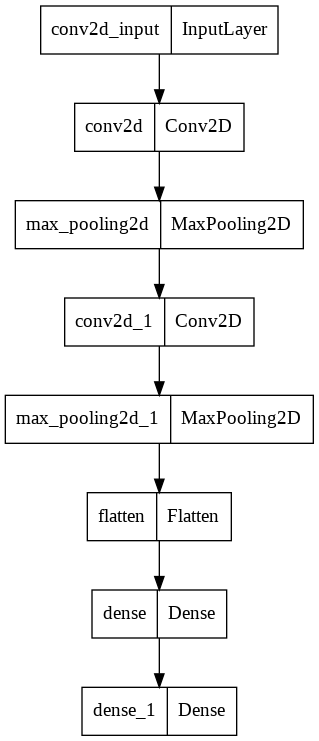

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file = 'cnn_model.png')

In [ ]:
from keras.backend import sparse_categorical_crossentropy
#Compile the model

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Fit the model
 
history = model.fit(train_img, train_labels,
                    epochs = 10,
                    validation_data=(test_img, test_labels))

Epoch 1/10
1563/1563 [==============================] - 49s 31ms/step - loss: 1.5018 - accuracy: 0.4607 - val_loss: 1.2990 - val_accuracy: 0.5389
Epoch 2/10
1563/1563 [==============================] - 47s 30ms/step - loss: 1.1755 - accuracy: 0.5853 - val_loss: 1.0920 - val_accuracy: 0.6158
Epoch 3/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.0454 - accuracy: 0.6352 - val_loss: 1.0399 - val_accuracy: 0.6404
Epoch 4/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.9685 - accuracy: 0.6607 - val_loss: 0.9918 - val_accuracy: 0.6547
Epoch 5/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.9093 - accuracy: 0.6821 - val_loss: 0.9730 - val_accuracy: 0.6630
Epoch 6/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.8587 - accuracy: 0.6985 - val_loss: 0.9319 - val_accuracy: 0.6830
Epoch 7/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.8159 - accuracy: 0.7143 - val_loss: 0.9769 -

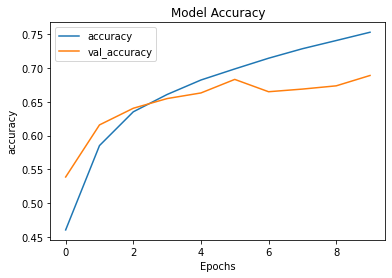

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['accuracy','val_accuracy'], loc = 'upper left')
plt.show()

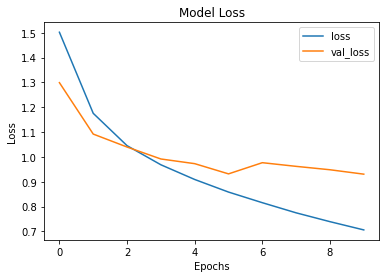

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend(['loss','val_loss'])
plt.show()

1/1 [==============================] - 0s 81ms/step
Output Label 1
automobile


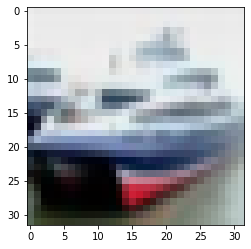

In [ ]:
plt.imshow(test_img[1])

labels = ['aeroplane', 'automobile', 'bird', 'cat', 'deer', ' dog', 'frog', 'horse', 'ship', 'truck']

import cv2

resized_img = cv2.resize(test_img[9],(32,32))
resized_img = np.expand_dims(resized_img, axis = 0)

pre = model.predict(resized_img)

n = np.argmax(pre)

print("Output Label", n)
print(labels[n])

1/1 [==============================] - 0s 15ms/step


array([[4.3465418e-04, 9.8597187e-01, 7.1448212e-06, 5.1630050e-06,
        8.6079008e-06, 1.7496885e-06, 3.6748868e-06, 1.4043626e-06,
        2.0527949e-04, 1.3360473e-02]], dtype=float32)